In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('loan_data.csv')

In [2]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
# Check the missing values
missing_values = data.isnull().sum()
print(missing_values)

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [4]:
# Analysis of categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_distribution = {col: data[col].value_counts() for col in categorical_cols}
print(categorical_cols)


Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


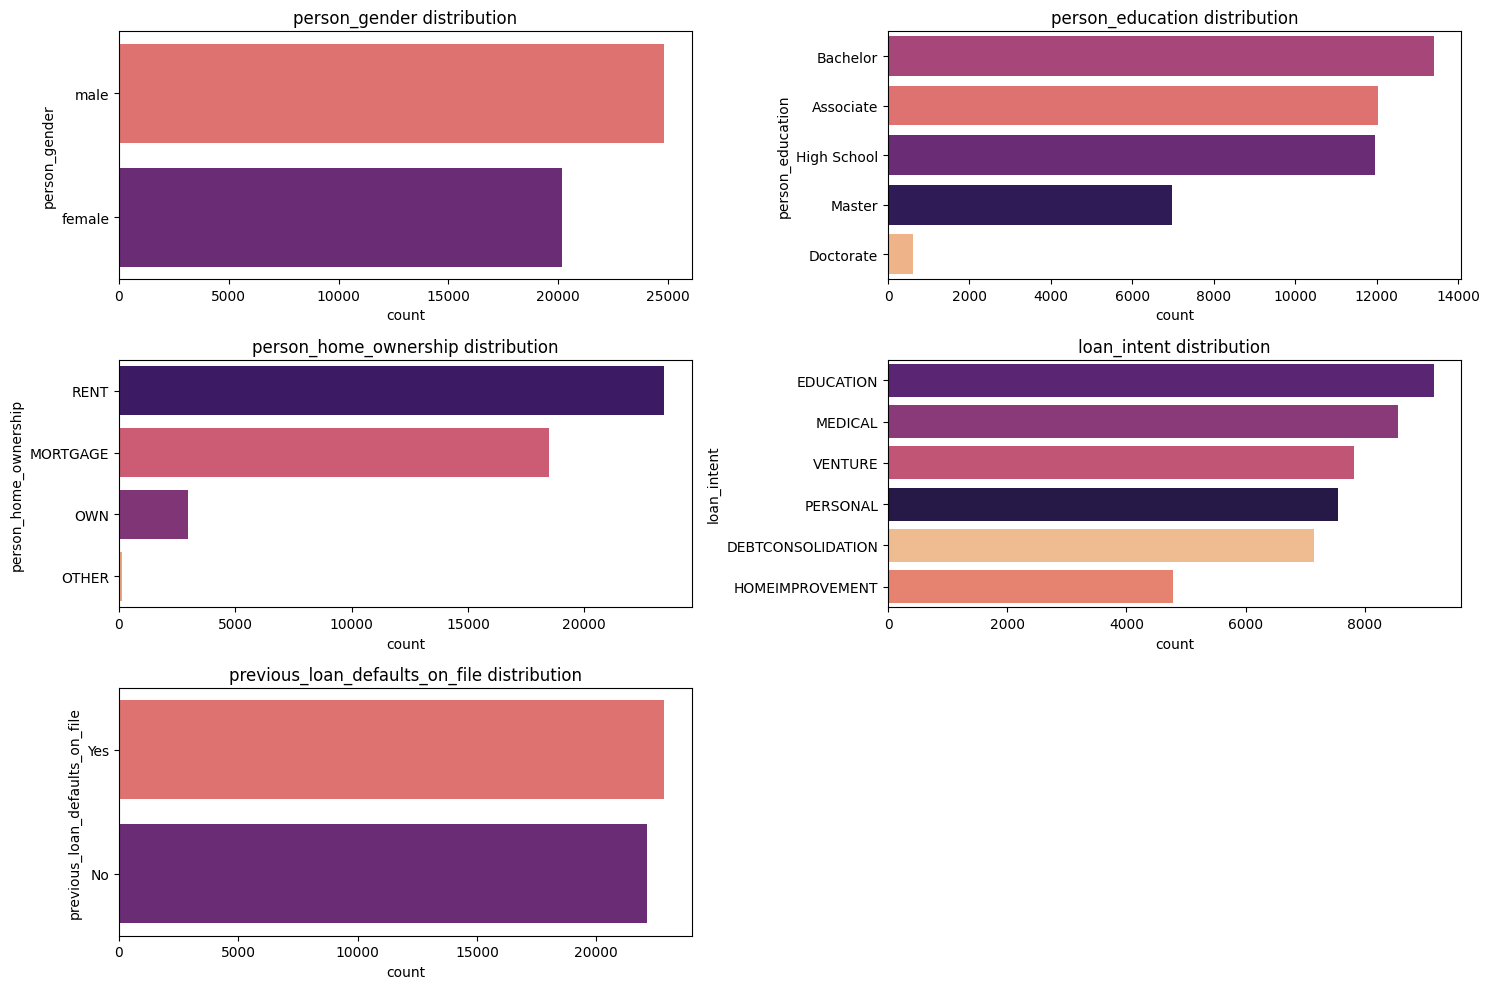

In [5]:
# Visualization of categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette='magma', hue=data[col])
    plt.title(f"{col} distribution")
    plt.tight_layout()
plt.show()


In [6]:
# analysis of numerical variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_summary = data[numerical_cols].describe()
print("\nSummary of numerical variables\n", numerical_cols)


Summary of numerical variables
 Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')


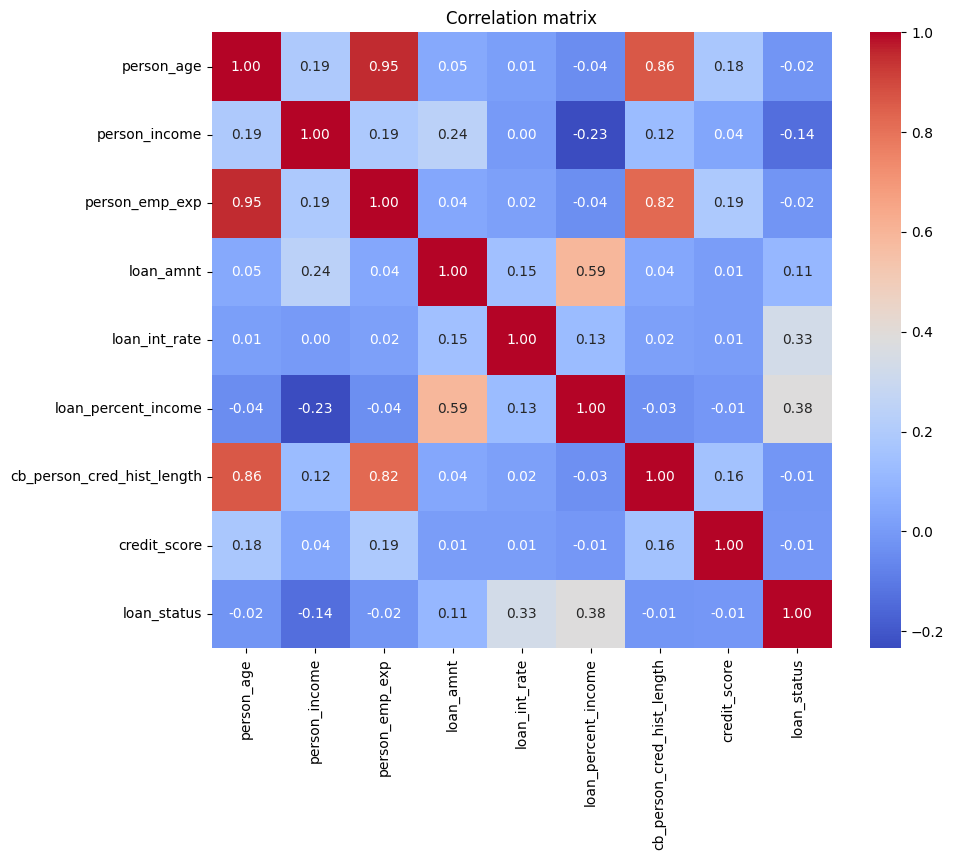

In [7]:
# Correlation matrix
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")
plt.show()

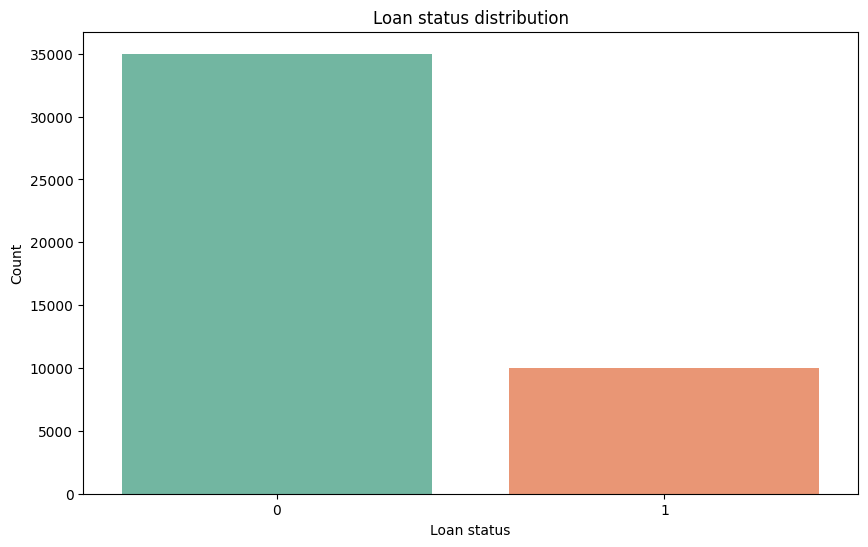

In [12]:
# Analysis of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=data['loan_status'], palette='Set2', hue=data['loan_status'], legend=False)
plt.title("Loan status distribution")
plt.xlabel("Loan status")
plt.ylabel("Count")
plt.show()

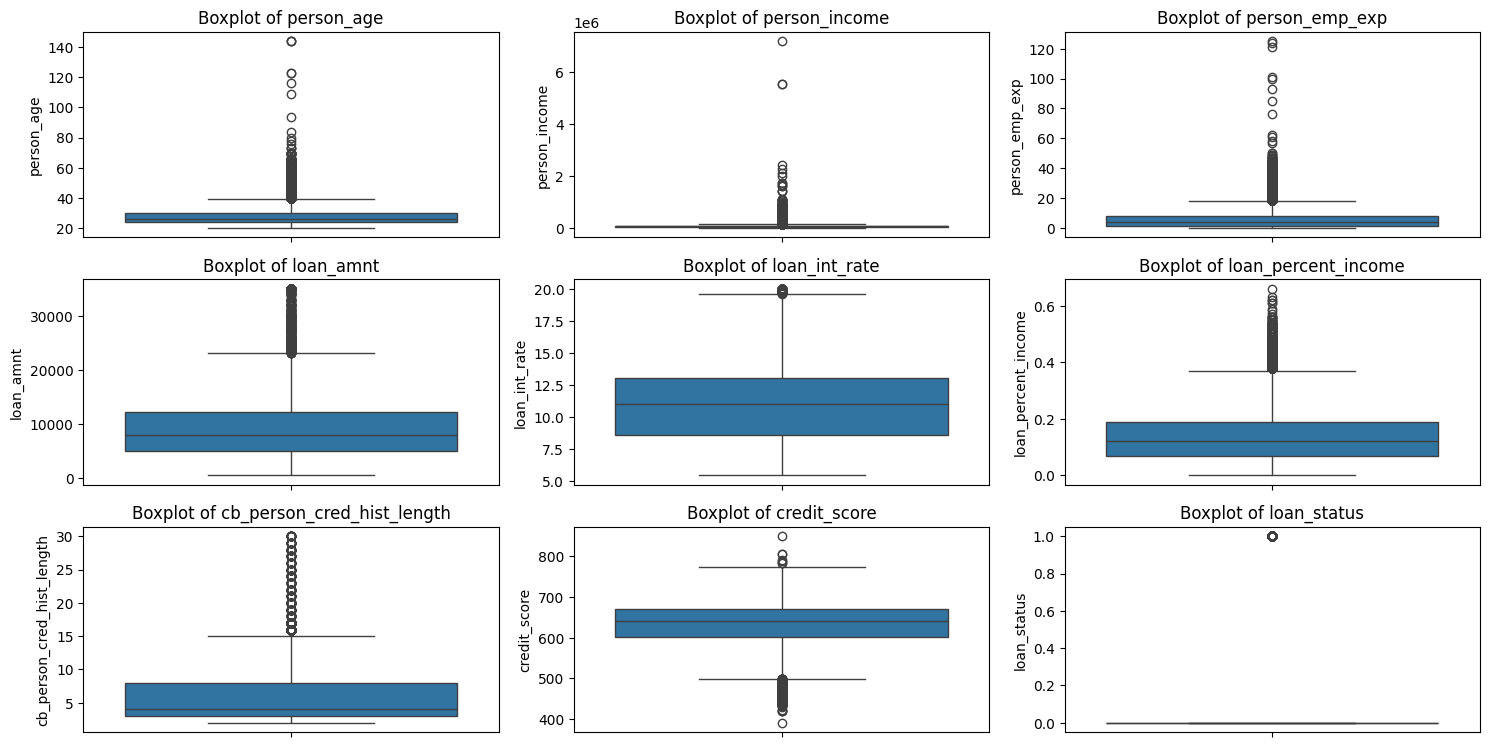

In [16]:
# Visualization of extreme values
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()